## Code along- overfitting and underfitting
- Simulate data

$y= a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error is standard normal distrubuted)

In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
samples = 100
X= np.random.uniform(-3, 3, (samples, 1))
X

array([[-2.97539739],
       [ 2.36100951],
       [ 1.21325679],
       [-2.31212936],
       [-1.84900448],
       [ 1.6322754 ],
       [ 0.53581597],
       [ 0.27198768],
       [-2.21155989],
       [-1.11930029],
       [ 1.68448257],
       [-2.19552531],
       [-1.65152796],
       [-0.06602506],
       [ 1.84411982],
       [ 2.8149041 ],
       [ 1.64407201],
       [ 0.97150139],
       [-1.99837327],
       [ 0.18129948],
       [ 2.25128002],
       [ 2.65125901],
       [ 2.91139069],
       [ 2.26198786],
       [-2.10950377],
       [-0.09541243],
       [-1.46208888],
       [ 0.65135361],
       [-1.40460975],
       [ 1.48947327],
       [-1.04804271],
       [-1.5724027 ],
       [ 1.22119889],
       [ 0.98453851],
       [-1.42548221],
       [ 0.03724772],
       [ 2.78729584],
       [ 1.95479896],
       [-1.67691809],
       [-2.83334131],
       [-0.44177576],
       [ 0.89282037],
       [-1.92981252],
       [-1.81459868],
       [-0.14184289],
       [-1

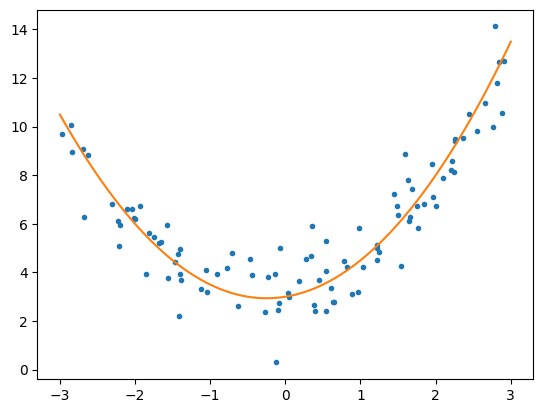

In [118]:
# a0 = 3, a1 = 0.5, a2 = 1
f= lambda x: x**2 + 0.5*x + 3
y= f(X) + np.random.randn(samples, 1)


x= np.linspace(-3, 3, samples)
plt.plot(X,y, ".")
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

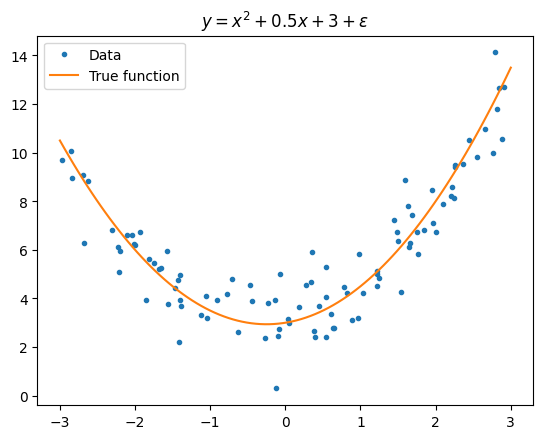

In [119]:
def draw_data():
    fig, ax= plt.subplots()
    ax.plot(X, y, ".", label= "Data")
    ax.plot(x, f(x), label= "True function")
    ax.set(title= r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()
    return ax
    
draw_data()

## Polynomial regression

In [120]:
X[:5], X.shape

(array([[-2.97539739],
        [ 2.36100951],
        [ 1.21325679],
        [-2.31212936],
        [-1.84900448]]),
 (100, 1))

In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree= 2, include_bias= False)

poly_features= poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[-2.97539739,  8.85298965],
        [ 2.36100951,  5.57436592],
        [ 1.21325679,  1.47199204],
        [-2.31212936,  5.3459422 ],
        [-1.84900448,  3.41881758]]),
 (100, 2))

## Train on trasformed dataset

- Use multiple linear regression on our polynomial features
- This gives us polynomial regression of second order

In [122]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(poly_features, y)

# Estimated: a1,a2 from data, note that true value was a1=0.5, a2=1

model.coef_

array([[0.49841873, 0.89780198]])

In [123]:
# Estimated a0 from data, note that true a0= 3
model.intercept_

array([3.24488132])

## Visualise true model and estimated model

In [124]:
# x is our linspace, its 1 dimentional
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

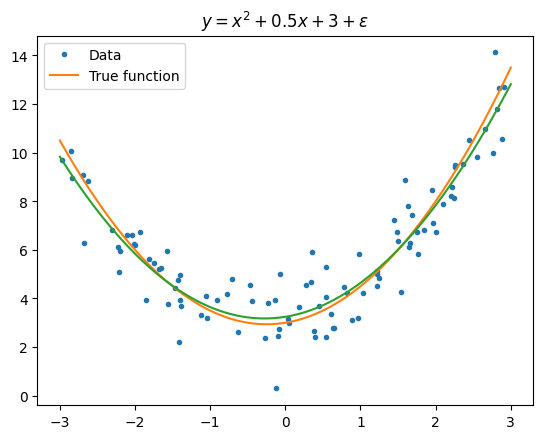

In [125]:

x_poly_features= poly.transform(x.reshape(-1, 1))
y_pred = model.predict(x_poly_features)

ax= draw_data()

ax.plot(x, y_pred, label= "model")

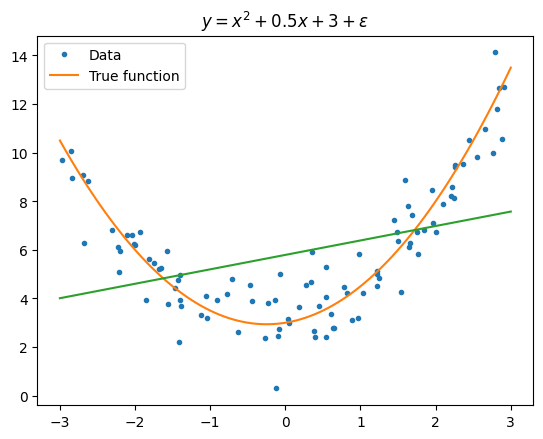

In [126]:
model= LinearRegression()
model.fit(X, y)
ax= draw_data()
ax.plot(x, model.predict(x.reshape(-1, 1)))

## Overfitting

In [127]:
poly_model_30 = PolynomialFeatures(30, include_bias= False)
X_features= poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [128]:
x_poly_features= poly_model_30.transform(x.reshape(-1, 1))
x_poly_features.shape

(100, 30)

[(-1.0, 15.0), Text(0.5, 1.0, 'Overfitted model')]

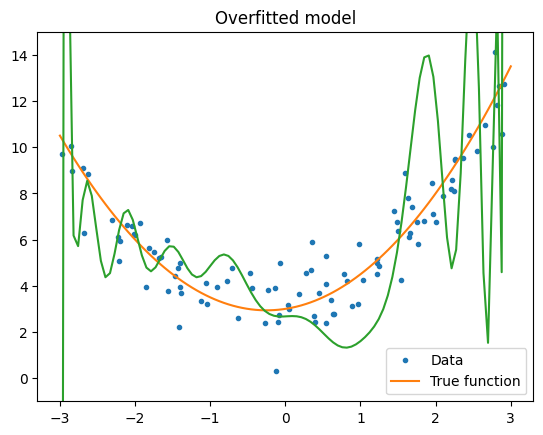

In [129]:
model= LinearRegression()
model.fit(X_features, y)
y_pred= model.predict(x_poly_features)

ax= draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1, 15], title= "Overfitted model")